# **Analysis of Technical Indicators**
> By Karan Thakur


**EWMA/SMA - Exponentially Weighted Moving Average/Simple Moving Average**

In [1]:
# Importing libraries
import pandas as pd
from pandas_datareader import data as pdr
import numpy as np
import yfinance as yfin
yfin.pdr_override() # This is crucial to avioid list constraints
import math
import datetime
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
end_date = datetime.datetime.now()
start_date = end_date - datetime.timedelta(365)

In [3]:
def get_data(ticker):
  asset = pdr.get_data_yahoo(ticker, start = start_date, end = end_date)
  # This is done to make the date feild into a column
  asset.reset_index(inplace = True)
  return asset

aapl = get_data('AAPL')
aapl

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-03,138.210007,143.070007,137.690002,142.449997,141.609909,114311700
1,2022-10-04,145.029999,146.220001,144.259995,146.100006,145.238403,87830100
2,2022-10-05,144.070007,147.380005,143.009995,146.399994,145.536606,79471000
3,2022-10-06,145.809998,147.539993,145.220001,145.429993,144.572342,68402200
4,2022-10-07,142.539993,143.100006,139.449997,140.089996,139.263824,85925600
...,...,...,...,...,...,...,...
246,2023-09-26,174.820007,175.199997,171.660004,171.960007,171.960007,64588900
247,2023-09-27,172.619995,173.039993,169.050003,170.429993,170.429993,66921800
248,2023-09-28,169.339996,172.029999,167.619995,170.690002,170.690002,56294400
249,2023-09-29,172.020004,173.070007,170.339996,171.210007,171.210007,51814200


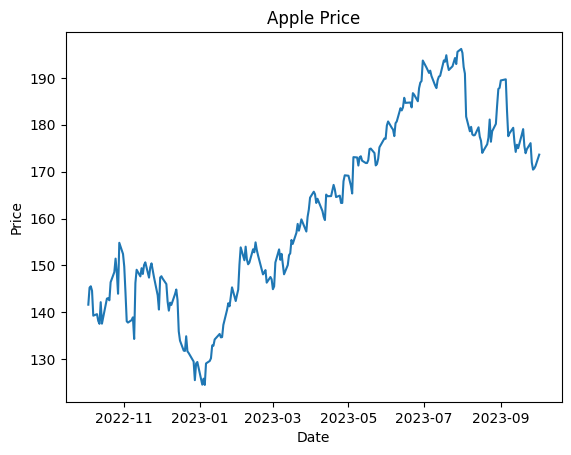

In [4]:
plt.plot(aapl['Date'], aapl['Adj Close'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Apple Price')
plt.show()

In [5]:
# Now we can calculate the values of indicators

aapl_ewm50 = aapl['Adj Close'].ewm(span = 50, adjust = False).mean()
aapl_ewm200 = aapl['Adj Close'].ewm(span = 200, adjust = False).mean()
aapl_sma10 = aapl['Adj Close'].rolling(window = 10).mean()
aapl_sma20 = aapl['Adj Close'].rolling(window = 20).mean()

<function matplotlib.pyplot.show(close=None, block=None)>

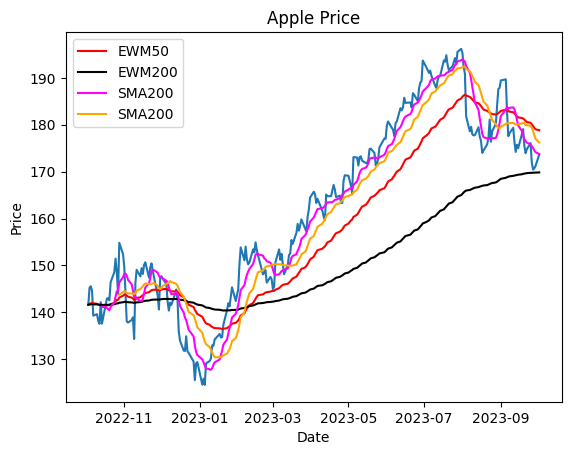

In [6]:
plt.plot(aapl['Date'], aapl['Adj Close'])
plt.plot(aapl['Date'], aapl_ewm50, label = 'EWM50', color = 'red')
plt.plot(aapl['Date'], aapl_ewm200, label = 'EWM200', color = 'black')
plt.plot(aapl['Date'], aapl_sma10, label = 'SMA10', color = 'magenta')
plt.plot(aapl['Date'], aapl_sma20, label = 'SMA20', color = 'orange')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Apple Price')
plt.legend(loc = 'upper left')
plt.show